In [1]:
import pandas as pd
df = pd.read_csv('carprice.csv')
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.iloc[1]

car_ID                                2
symboling                             3
CarName             alfa-romero stelvio
fueltype                            gas
aspiration                          std
doornumber                          two
carbody                     convertible
drivewheel                          rwd
enginelocation                    front
wheelbase                          88.6
carlength                         168.8
carwidth                           64.1
carheight                          48.8
curbweight                         2548
enginetype                         dohc
cylindernumber                     four
enginesize                          130
fuelsystem                         mpfi
boreratio                          3.47
stroke                             2.68
compressionratio                      9
horsepower                          111
peakrpm                            5000
citympg                              21
highwaympg                           27


In [9]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:
df.drop(['car_ID'],axis=1,inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [15]:
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,2,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,118
1,5,3,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,137
2,3,1,1,0,1,2,2,0,10,29,...,28,5,1,28,13,45,10,6,9,137
3,4,4,1,0,0,3,1,0,30,45,...,11,5,13,25,22,27,16,11,13,123
4,4,5,1,0,0,3,0,0,28,45,...,22,5,13,25,5,33,16,5,5,148


In [16]:
len(df.columns)

25

<AxesSubplot:>

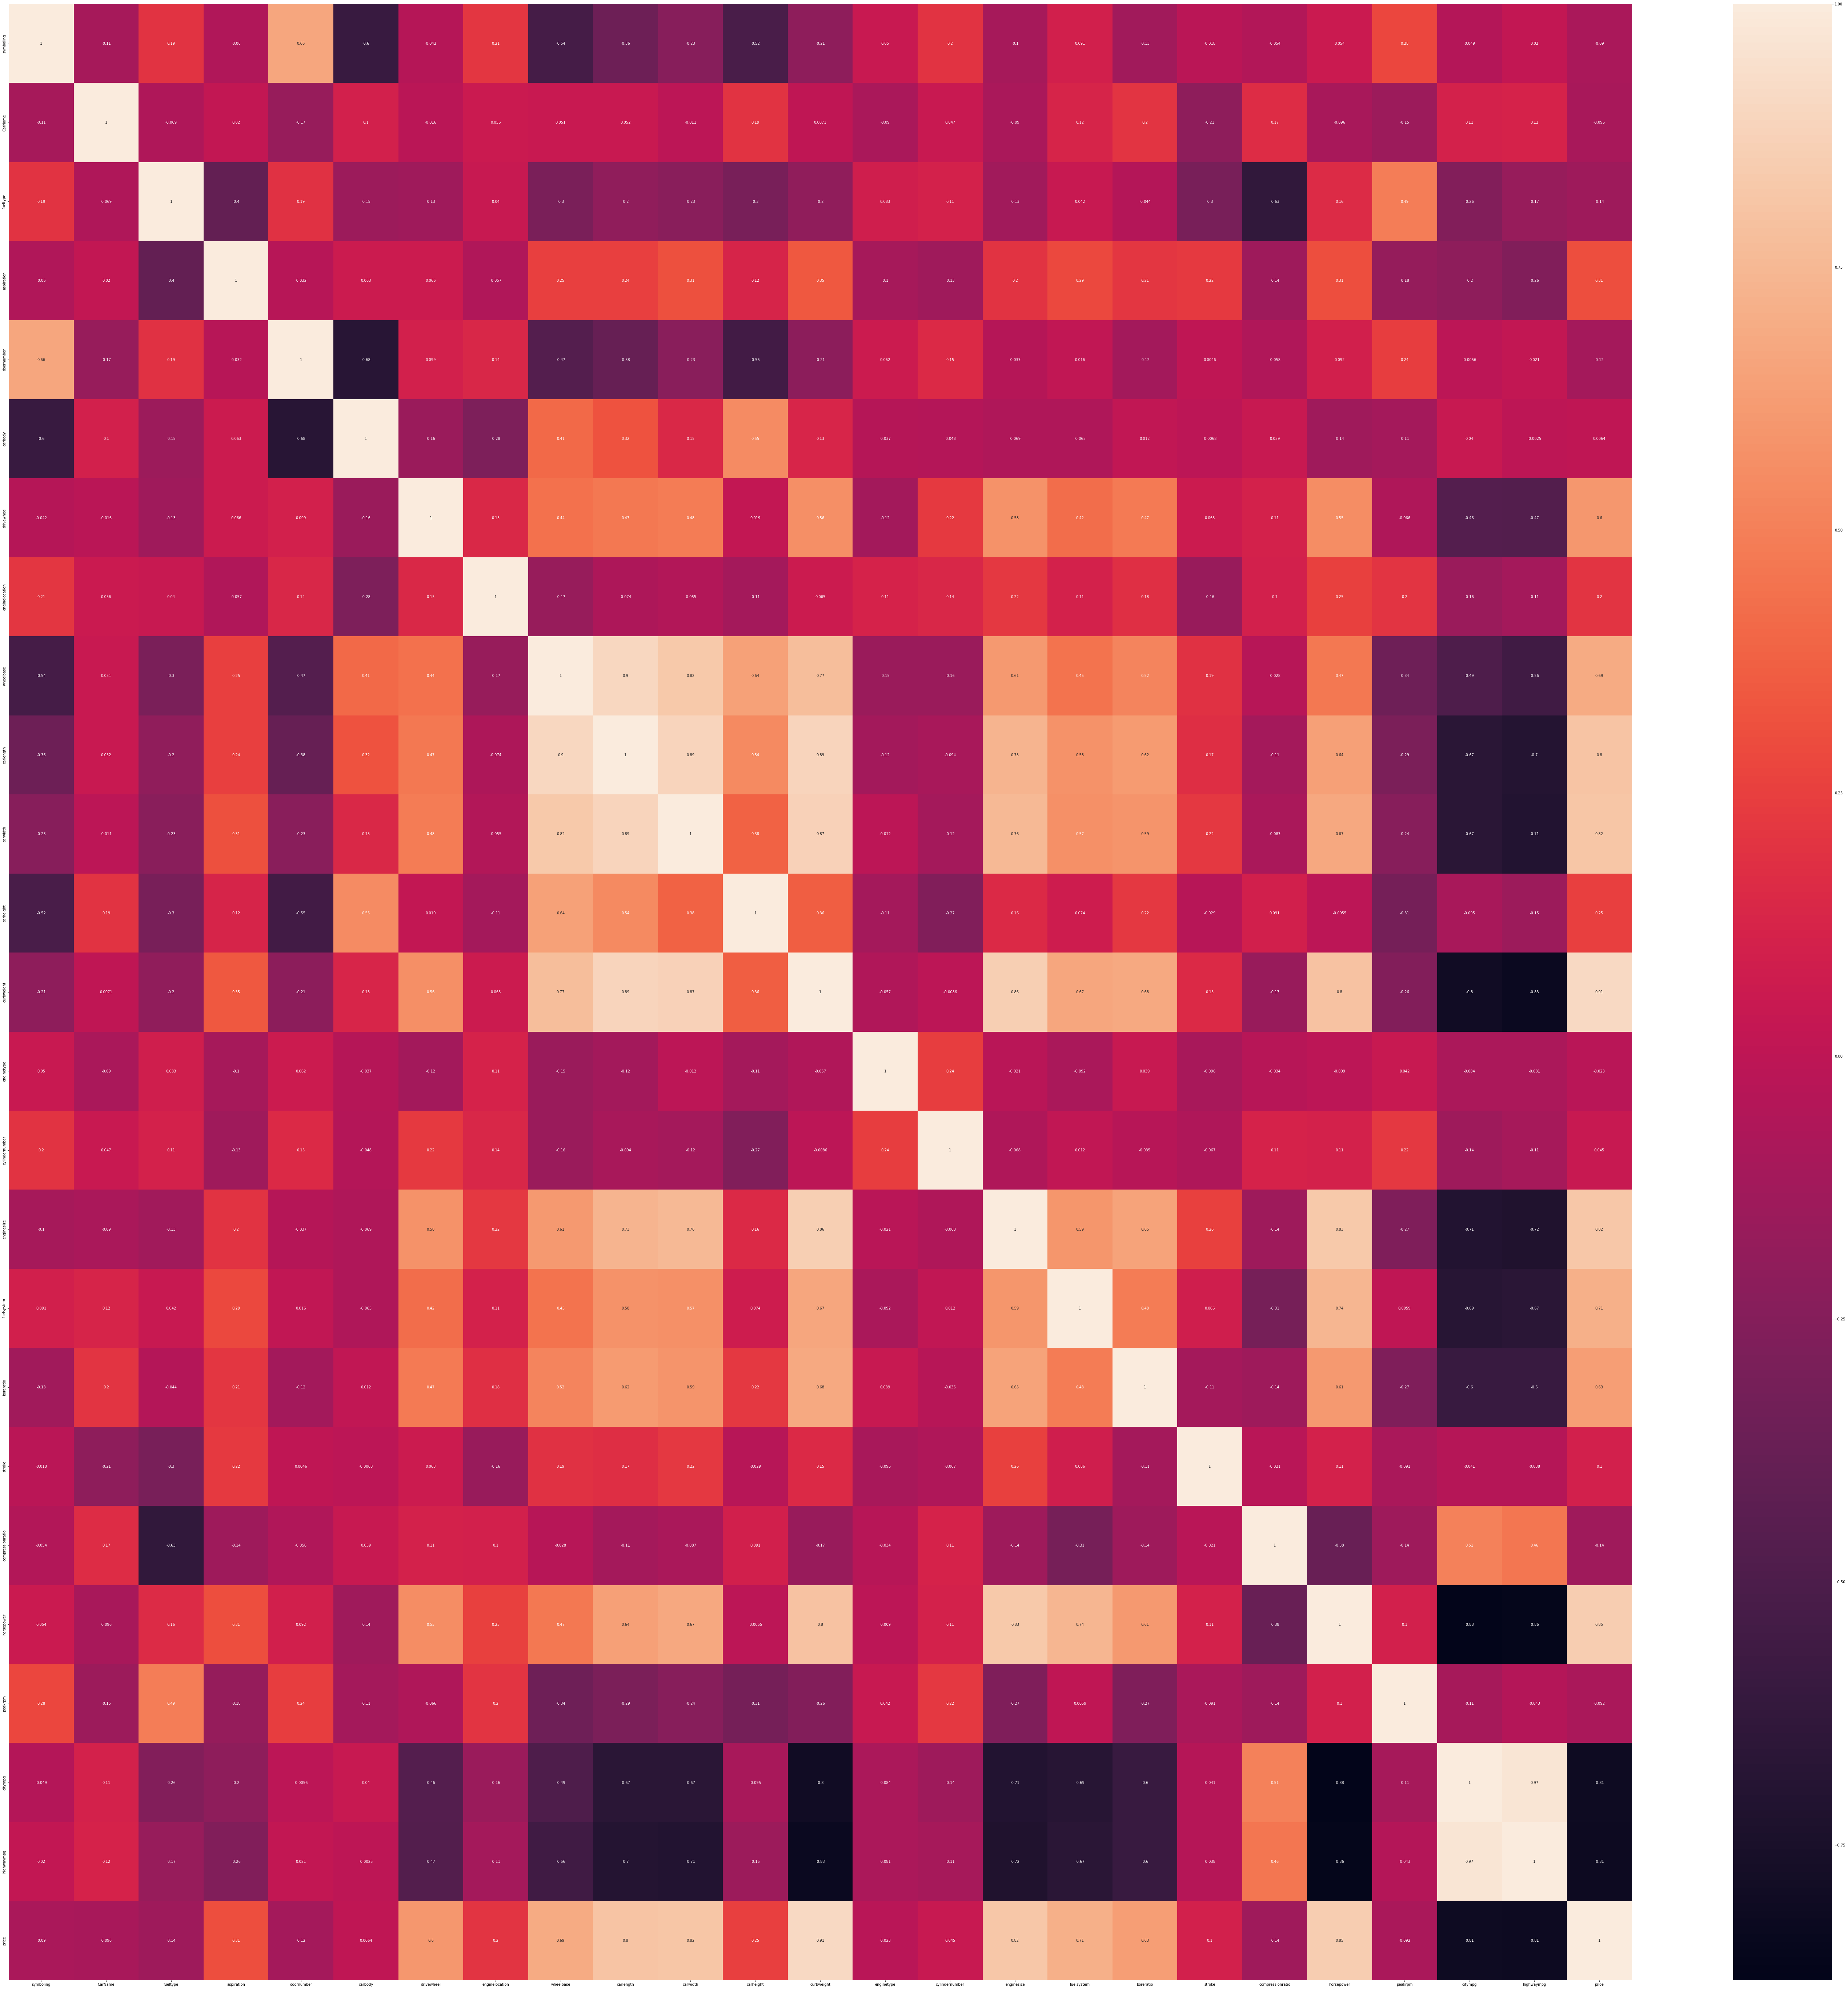

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(),annot=True)

In [74]:
# n = input("Select a column:")
# print("Select a column: \n")
# for index,col in enumerate(df.columns):
#     print(f"{index} : {col}")
# n = int(input("Select: "))
n = 24
selected = df.columns[n]
#find with correlation is above 0.5 and below -0.5
import numpy as np
def find_corrention(df):
    corr = df.corr()
    corr = corr[abs(corr) > 0.4]
    corr = corr.dropna(how='all',axis=0)
    corr = corr.dropna(how='all',axis=1)
    return corr

good = []
corr = find_corrention(df)
print(type(corr[selected]))
# print(corr[selected].columns)
# for index,value in corr[selected].items():
#     print(type(value))
#     if value!='NaN':
#         good.append(index)
good = {col:value for col,value in corr[selected].items() if abs(value)>0.4}
#sort the dict with values for absoulte value of the values
result = sorted(good.items(),key=lambda x:abs(x[1]),reverse=True)
print("Columns with high correlation:")

ans = [ a[0] for a in result]
# print(ans)
print("\n".join(ans[:10]))

<class 'pandas.core.series.Series'>
Columns with high correlation:
price
curbweight
horsepower
enginesize
carwidth
highwaympg
citympg
carlength
fuelsystem
wheelbase


In [75]:
df_selected = df[ans]

In [76]:
df_selected

,price,curbweight,horsepower,enginesize,carwidth,highwaympg,citympg,carlength,fuelsystem,wheelbase,boreratio,drivewheel
0,118,92,30,18,8,10,8,22,5,2,23,2
1,137,92,30,18,8,10,8,22,5,2,23,2
2,137,115,45,28,16,9,6,29,5,10,1,2
3,123,66,27,11,21,13,11,45,5,30,13,1
4,148,116,33,22,23,5,5,45,5,28,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,143,125,32,24,34,11,10,63,5,46,35,2
201,161,135,48,24,33,8,6,63,5,46,35,2
202,165,129,38,33,34,6,5,63,5,46,26,2
203,167,151,28,25,34,10,13,63,3,46,6,2


In [77]:
y = df_selected['price']
x = df_selected.drop(['price'],axis=1)

In [90]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2)

In [91]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(train_x)
train_x[train_x.columns] = scale.transform(train_x[train_x.columns])
test_x[test_x.columns] = scale.transform(test_x[test_x.columns])



In [92]:
train_x

,curbweight,horsepower,enginesize,carwidth,highwaympg,citympg,carlength,fuelsystem,wheelbase,boreratio,drivewheel
135,0.633136,0.491228,0.357143,0.547619,0.379310,0.285714,0.794521,0.714286,0.500000,0.675676,0.5
45,0.053254,0.157895,0.071429,0.071429,0.827586,0.892857,0.027397,0.142857,0.192308,0.189189,0.5
69,0.940828,0.631579,0.809524,0.833333,0.275862,0.321429,0.821918,0.428571,0.826923,0.702703,1.0
115,0.828402,0.403509,0.333333,0.738095,0.241379,0.214286,0.808219,0.714286,0.846154,0.594595,1.0
134,0.603550,0.491228,0.357143,0.547619,0.379310,0.285714,0.794521,0.714286,0.500000,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...
197,0.781065,0.543860,0.547619,0.619048,0.379310,0.392857,0.849315,0.714286,0.750000,0.945946,1.0
97,0.171598,0.140351,0.142857,0.095238,0.655172,0.642857,0.356164,0.142857,0.192308,0.297297,0.5
10,0.426036,0.438596,0.214286,0.261905,0.413793,0.357143,0.616438,0.714286,0.615385,0.648649,1.0
78,0.130178,0.122807,0.119048,0.214286,0.689655,0.642857,0.068493,0.142857,0.153846,0.108108,0.5


In [93]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(train_x,train_y)
predict = svr.predict(test_x)
predict

array([108.44068508,  71.92438403,  70.61447476,  58.76706252,
        57.91581055,  93.27284486, 120.79129058, 100.65646513,
       114.72232396,  59.44992568,  76.01185624,  95.17577716,
       108.01272072, 119.1855117 ,  70.1275243 ,  58.39727325,
        70.63886575,  81.47208441, 123.6708014 , 111.69420726,
       114.20170785,  89.21997326, 119.26847896, 121.84773379,
        71.29562881,  66.45878314,  71.46159975, 111.69088412,
       111.4177521 , 113.51766392,  70.64145324,  57.96669876,
       118.09597228, 113.74709591,  86.66141531,  86.90176727,
       110.61675787,  58.15442054,  86.30810508,  86.31984856,
       115.70032817])

In [94]:
from sklearn.metrics import mean_squared_error , r2_score
print("R2 test",r2_score(test_y,predict))
print("MSE test",mean_squared_error(test_y,predict))

R2 test 0.5749468411689795
MSE test 1053.115347465178


In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x,train_y)
lr_predict = lr.predict(test_x)

In [96]:
lr_predict

array([109.9060465 ,  51.68230308,  55.68594443,  22.43192857,
        26.43428729, 101.25242453, 185.81864448,  96.26583123,
       154.24218048,  35.36834757,  50.88548229,  91.73717726,
       142.87045347, 139.42447125,   1.65681505,  19.69026679,
        45.70602562,  72.59006948, 170.46682656, 135.78861682,
       132.61376438,  83.28837554, 145.95069403, 157.73237328,
        47.36020472,  55.40347678,  48.80535197, 118.54960584,
       133.37467743, 124.57882315,  31.11539636,  24.98914004,
       137.90647886, 134.24336936,  74.23255561,  79.74226997,
       113.73244834,  22.09884554,  78.57837579,  72.78740835,
       141.19153779])

In [99]:
print(r2_score(test_y,lr_predict))
print(mean_squared_error(test_y,lr_predict))

0.8176107470234575
451.88917558113206
